In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator


#para leer los archivos necesitas instalar el paquete h5py, que lee archivos en formato hdf5 que es el formato de archivos que escribe el codigo de la simulacion.

name='/content/drive/MyDrive/Copia de flds.tot.00085'

f=h5py.File(name,'r') #llamamos al archivo en modo de lectura 'r'
bx=f.get('bx') #obtenemos el campo magnetico en x
bx=np.array(bx)[0,:,:] #fijamos en 0 la primera componente del arreglo porque siempre son en 3 dimensiones, sin embargo la primera tiene solo un elemento
bx=np.transpose(bx) #trasponemos porque la forma en que escribe el codigo y lee python deja las matrices traspuestas

by=f.get('by') #obtenemos el campo magnetico en x
by=np.array(by)[0,:,:] #fijamos en 0 la primera componente del arreglo porque siempre son en 3 dimensiones, sin embargo la primera tiene solo un elemento
by=np.transpose(by) #trasponemos porque la forma en que escribe el codigo y lee python deja las matrices traspuestas

bz=f.get('bz') #obtenemos el campo magnetico en x
bz=np.array(bz)[0,:,:] #fijamos en 0 la primera componente del arreglo porque siempre son en 3 dimensiones, sin embargo la primera tiene solo un elemento
bz=np.transpose(bz) #trasponemos porque la forma en que escribe el codigo y lee python deja las matrices traspuestas

ex=f.get('ex') #obtenemos el campo magnetico en x
ex=np.array(ex)[0,:,:] #fijamos en 0 la primera componente del arreglo porque siempre son en 3 dimensiones, sin embargo la primera tiene solo un elemento
ex=np.transpose(ex) #trasponemos porque la forma en que escribe el codigo y lee python deja las matrices traspuestas

ey=f.get('ey') #obtenemos el campo magnetico en x
ey=np.array(ey)[0,:,:] #fijamos en 0 la primera componente del arreglo porque siempre son en 3 dimensiones, sin embargo la primera tiene solo un elemento
ey=np.transpose(ey) #trasponemos porque la forma en que escribe el codigo y lee python deja las matrices traspuestas

ez=f.get('ez') #obtenemos el campo magnetico en x
ez=np.array(ez)[0,:,:] #fijamos en 0 la primera componente del arreglo porque siempre son en 3 dimensiones, sin embargo la primera tiene solo un elemento
ez=np.transpose(ez) #trasponemos porque la forma en que escribe el codigo y lee python deja las matrices traspuestas

#para las demas componentes del campo magnetico tienes que usar get('by') o 'bz', si quieres el campo electrico están en 'ex', 'ey' y 'ez'

b=np.array((bx,by,bz))

e=np.array((ex,ey,ez))

Nx=np.size(b[0,:,0])

Ny=np.size(b[0,0,:])

drift_vel= np.loadtxt('/content/drive/MyDrive/velocity_drift.txt').reshape(b.shape)

#gamma1= np.loadtxt('/content/gamma1.txt')

print(Nx,Ny)


5250 1536


In [54]:

v_i=np.array([0.1,0,0])

# Factor de Lorentz

gamma0=np.sqrt((1+np.linalg.norm(v_i)**2))
print(gamma0)

# Pasos temporales

factor=10

dx=1
dt=1

NT=30

x=np.arange(0,Nx,int(dx))
y=np.arange(0,Ny,int(dx))

r0 = [Nx/2, Ny/2 , 0]

1.004987562112089


In [93]:
import numpy as np
from scipy.interpolate import RegularGridInterpolator
import matplotlib.pyplot as plt

# Supongamos que ya tenemos definidas las siguientes variables:
# Nt, v_i, gamma0, Nx, Ny, x, y, bx, by, bz, ex, ey, ez, c, dt, t



def boris(v_i,gamma0,r0,ex,ey,ez,bx,by,bz,fact):

  t=np.linspace(0,NT,int(NT*155*fact)) # Defino mi Delta t como se obtuvo en en analisis

  Nt=int(np.size(t))

  p = np.zeros((Nt, 3))
  p[0, :] = v_i * gamma0  # Condición inicial de p

  # Trabajo de E

  Wx = np.zeros((Nt))
  Wy = np.zeros((Nt))
  Wz = np.zeros((Nt))

  v = np.zeros((Nt, 3))
  v[0, :] = v_i  # Condición inicial de v

  gamma = np.zeros((Nt))
  gamma[0] = gamma0

  r = np.zeros((Nt,3))

  r[0,:] = r0

  b_interp_func_x = RegularGridInterpolator((x, y), bx)
  b_interp_func_y = RegularGridInterpolator((x, y), by)
  b_interp_func_z = RegularGridInterpolator((x, y), bz)

  e_interp_func_x = RegularGridInterpolator((x, y), ex)
  e_interp_func_y = RegularGridInterpolator((x, y), ey)
  e_interp_func_z = RegularGridInterpolator((x, y), ez)

  # Array auxiliar para graficar
  r_plot = np.zeros((Nt, 3))
  r_plot[0, :] = r[0, :]

  for i in range(0, Nt - 1):
      # Condiciones de Borde periódicas
      crossed_boundary = False

      if r[i, 0] < 0:
          r[i, 0] += (Nx - 1)
          crossed_boundary = True
      elif r[i, 0] > Nx - 1:
          r[i, 0] -= (Nx - 1)
          crossed_boundary = True

      if r[i, 1] < 0:
          r[i, 1] += (Ny - 1)
          crossed_boundary = True
      elif r[i, 1] > Ny - 1:
          r[i, 1] -= (Ny - 1)
          crossed_boundary = True

      point = np.array((r[i, 0], r[i, 1]))

      b_interp_x = b_interp_func_x(point)
      b_interp_y = b_interp_func_y(point)
      b_interp_z = b_interp_func_z(point)
      b_interp = np.array((b_interp_x, b_interp_y, b_interp_z))[:, 0]

      e_interp_x = e_interp_func_x(point)
      e_interp_y = e_interp_func_y(point)
      e_interp_z = e_interp_func_z(point)
      e_interp = np.array((e_interp_x, e_interp_y, e_interp_z))[:, 0]

      a_act = -1/2 * b_interp/fact

      p0 = p[i, :] - e_interp / (2*fact)

      gammap0=np.sqrt(1+np.linalg.norm(p0)**2)

      p1 = p0 + 2 / (gammap0**2 + np.linalg.norm(a_act)**2) * np.cross((gammap0* p0 + np.cross(p0, a_act)), a_act)
      p[i + 1, :] = p1 - e_interp / (2*fact)

      gamma[i + 1] = np.sqrt((1 + np.linalg.norm(p[i + 1,:])**2))

      v[i+1, :] = p[i+1 , :] / gamma[i+1] # Obtenemos v de vuelta

      # Actualizamos la posición r_i+1
      r[i + 1, :] = r[i, :] + v[i, :] * dt/fact*0.45/8  # r_i+1 = r_i + v_i delta t

      # Actualizar el array auxiliar para graficar
      if crossed_boundary:
          r_plot[i, :] = [np.nan, np.nan, np.nan]  # Insertar NaN para romper la línea en el gráfico
      r_plot[i+1, :] = r[i+1, :]

      Wx[i]=-e_interp_x*(r[i+1,0]-r[i,0])
      Wy[i]=-e_interp_y*(r[i+1,1]-r[i,1])
      Wz[i]=-e_interp_z*(r[i+1,2]-r[i,2])
  return r_plot,v,gamma,Wx,Wy,Wz

r_plot,v,gamma,Wx,Wy,Wz=boris(v_i,gamma0,r0,ex,ey,ez,bx,by,bz,1)
r_plot1,v1,gamma1,Wx1,Wy1,Wz1=boris(v_i,gamma0,r0,ex,ey,ez,bx,by,bz,1/4)


<ipython-input-93-2bbc62fa2672>:98: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Wx[i]=-e_interp_x*(r[i+1,0]-r[i,0])
<ipython-input-93-2bbc62fa2672>:99: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Wy[i]=-e_interp_y*(r[i+1,1]-r[i,1])
<ipython-input-93-2bbc62fa2672>:100: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Wz[i]=-e_interp_z*(r[i+1,2]-r[i,2])


In [94]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# import numpy as np
# from matplotlib.colors import Normalize
# from matplotlib.cm import ScalarMappable

# # Suponiendo que r_plot, bz, drift_vel, Wx, Wy, Wz, gamma, x, y y t ya están definidos correctamente

# # Crear las matrices de malla X, Y para el streamplot
# X, Y = np.meshgrid(x, y)

# # Transponer las matrices de velocidad del drift para que coincidan con las dimensiones de X e Y
# U = drift_vel[0].T  # Transponer para que coincida con X
# V = drift_vel[1].T  # Transponer para que coincida con Y

# l=2

# vmin=-l

# vmax=1

# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# import numpy as np

# # Suponiendo que r_plot, bz, drift_vel, Wx, Wy, Wz, gamma, x, y, t, U, V, X, Y, vmin, vmax están definidos correctamente

# # Ajuste del tamaño de la figura global para incluir todos los gráficos
# fig = plt.figure(figsize=(30, 25))

# # Título general para todo el lienzo
# fig.suptitle('t=' +str(dt) , fontsize=16)

# # Gráfico 3D de la trayectoria de la partícula
# ax1 = fig.add_axes([0.05, 0.55, 0.25, 0.35], projection='3d')
# ax1.plot(r_plot[:, 0], r_plot[:, 1], r_plot[:, 2], label='Trayectoria de la Partícula')
# ax1.scatter(r_plot[0, 0], r_plot[0, 1], r_plot[0, 2], color='g', s=100, label='Punto Inicial')
# ax1.set_xlabel('$y$', fontsize=14)
# ax1.set_ylabel('$x$', fontsize=14)
# ax1.set_zlabel('$z$', fontsize=14)
# ax1.legend()
# ax1.set_title('Trayectoria de la Partícula en 3D', fontsize=14)

# # Gráfico 2D de la trayectoria de la partícula con el campo magnético Bz
# ax2 = fig.add_axes([0.35, 0.55, 0.25, 0.35])
# ax2.plot(r_plot[:, 0], r_plot[:, 1], 'r', linewidth=1, label='Trayectoria de la Partícula')
# ax2.plot(r_plot[0, 0], r_plot[0, 1], 'go', markersize=10, label='Punto Inicial')
# im1 = ax2.imshow(bz.T, origin='lower', extent=[x.min(), x.max(), y.min(), y.max()], cmap='viridis', alpha=0.8)
# fig.colorbar(im1, ax=ax2, label='$B_z$', orientation='vertical')
# ax2.set_xlabel('$y$', fontsize=14)
# ax2.set_ylabel('$x$', fontsize=14)
# ax2.set_title('Campo Magnético $B_z$', fontsize=14)
# ax2.legend()

# # Gráfico 2D de la trayectoria de la partícula y el streamplot de la velocidad del drift
# ax3 = fig.add_axes([0.65, 0.55, 0.25, 0.35])
# ax3.plot(r_plot[:, 0], r_plot[:, 1], 'r', linewidth=2, label='Trayectoria de la Partícula')
# ax3.plot(r_plot[0, 0], r_plot[0, 1], 'go', markersize=10, label='Punto Inicial')
# strm = ax3.streamplot(X, Y, U, V, linewidth=1, density=3, cmap='viridis')
# fig.colorbar(strm.lines, ax=ax3, label='Intensidad de Velocidad')
# ax3.set_xlabel('$x$', fontsize=14)
# ax3.set_ylabel('$y$', fontsize=14)
# ax3.set_title('Velocidad del Drift', fontsize=14)
# ax3.legend()

# # Gráfico 2D de la trayectoria de la partícula con el campo de velocidad del drift vdz
# ax4 = fig.add_axes([0.05, 0.1, 0.25, 0.35])
# ax4.plot(r_plot[:, 0], r_plot[:, 1], 'r', linewidth=1, label='Trayectoria de la Partícula')
# ax4.plot(r_plot[0, 0], r_plot[0, 1], 'go', markersize=1, label='Punto Inicial')
# im2 = ax4.imshow(drift_vel[2,:,:], extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', cmap='viridis', alpha=0.8, vmin=vmin, vmax=vmax)
# fig.colorbar(im2, ax=ax4, label='$v^{D}_{z}$', orientation='vertical')
# ax4.set_xlabel('$y$', fontsize=14)
# ax4.set_ylabel('$x$', fontsize=14)
# ax4.set_title('Velocidad del Drift $v^{D}_z$', fontsize=14)
# ax4.legend()

# # Gráfico 1D de gamma en función del tiempo
# ax5 = fig.add_axes([0.35, 0.1, 0.25, 0.35])
# ax5.semilogy(t, gamma-1)
# ax5.set_xlabel('$t$', fontsize=14)
# ax5.set_ylabel('$\log{\gamma-1}$', fontsize=14)
# ax5.set_title('Factor Lorentz $\gamma$', fontsize=14)

# # Gráfico 1D de la posición en x en función del tiempo
# ax6 = fig.add_axes([0.65, 0.1, 0.25, 0.35])
# ax6.plot(t, r_plot[:,0])
# ax6.set_xlabel('$t$', fontsize=14)
# ax6.set_ylabel('$x$', fontsize=14)
# ax6.set_title('Posición en $x$', fontsize=14)

# # Gráfico 1D del trabajo realizado en función del tiempo
# ax7 = fig.add_axes([0.35, 0.025, 0.25, 0.05])
# ax7.plot(t, Wx, label='Trabajo en x')
# ax7.plot(t, Wy, label='Trabajo en y')
# ax7.plot(t, Wz, label='Trabajo en z')
# ax7.set_xlabel('$t$', fontsize=14)
# ax7.set_ylabel('$W$', fontsize=14)
# ax7.set_title('Trabajo Realizado', fontsize=14)
# ax7.legend()

# # Mostrar el valor de gamma en el segundo punto
# print(gamma[1])

# plt.show()


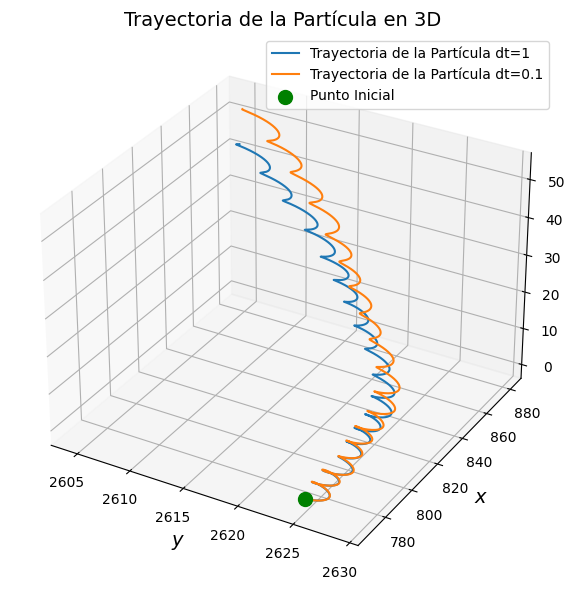

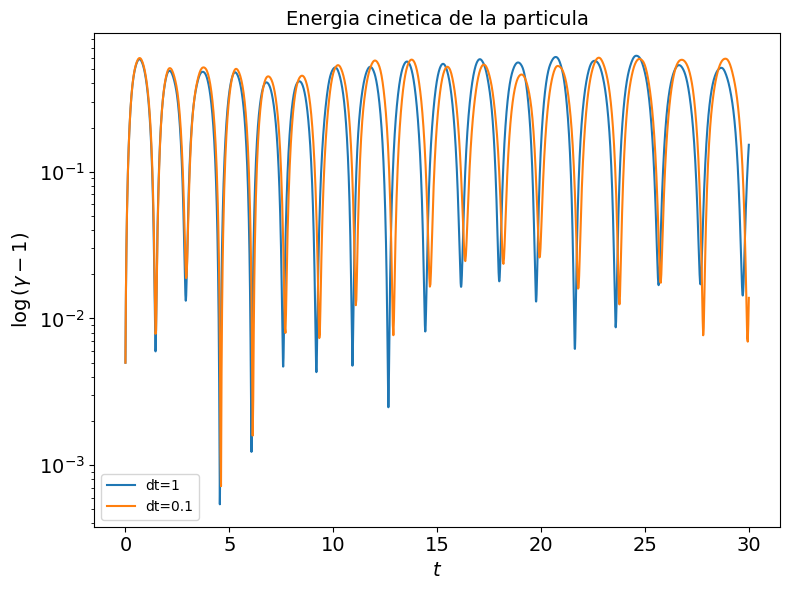

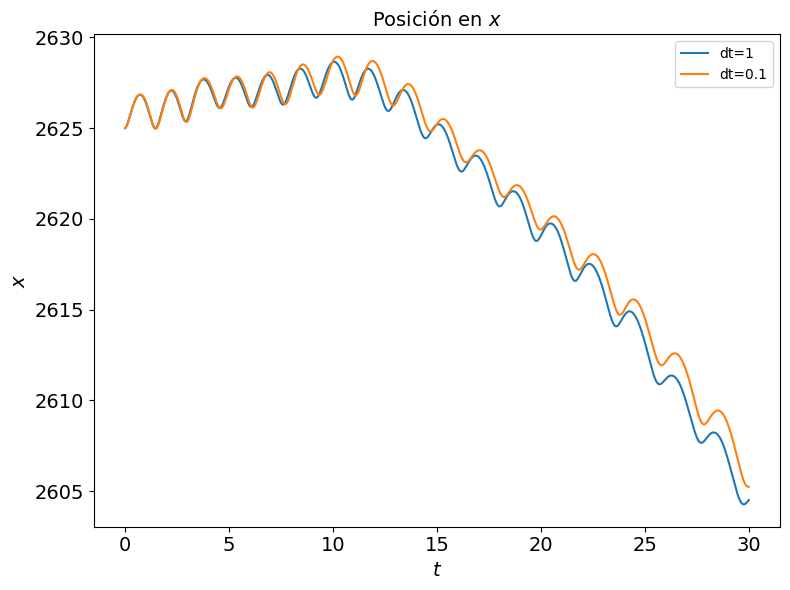

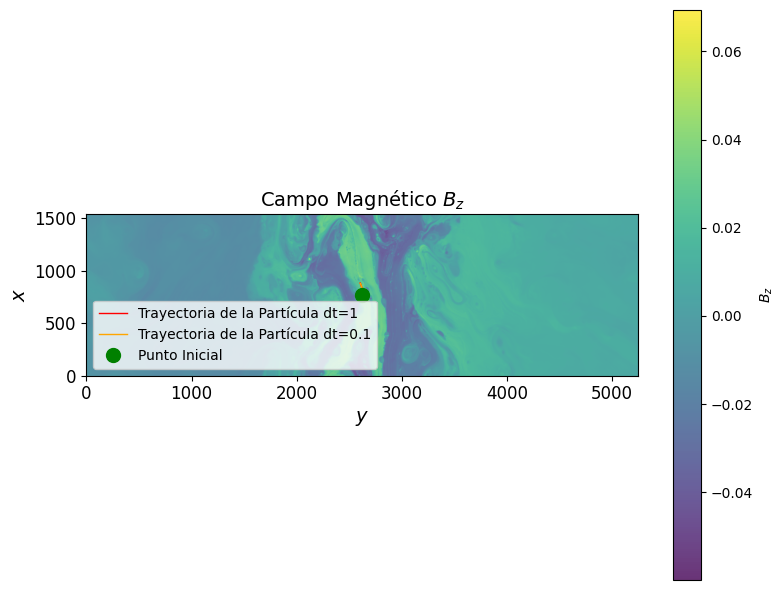

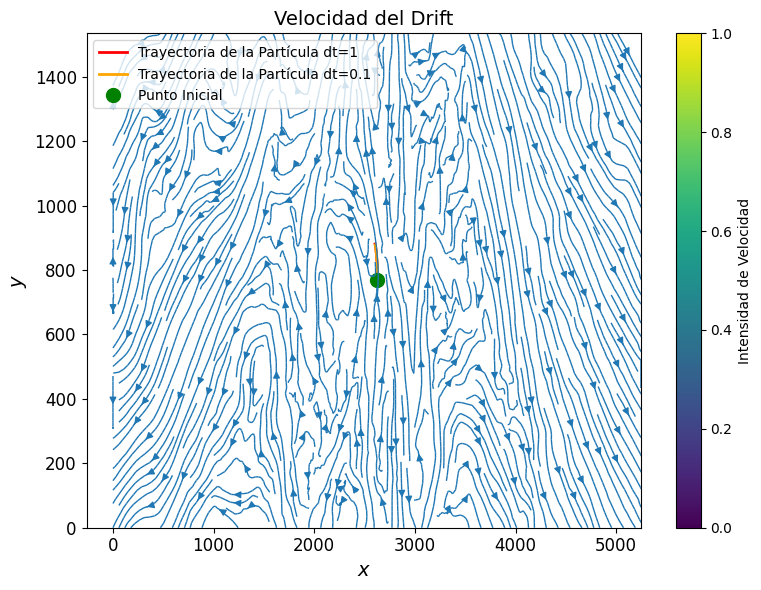

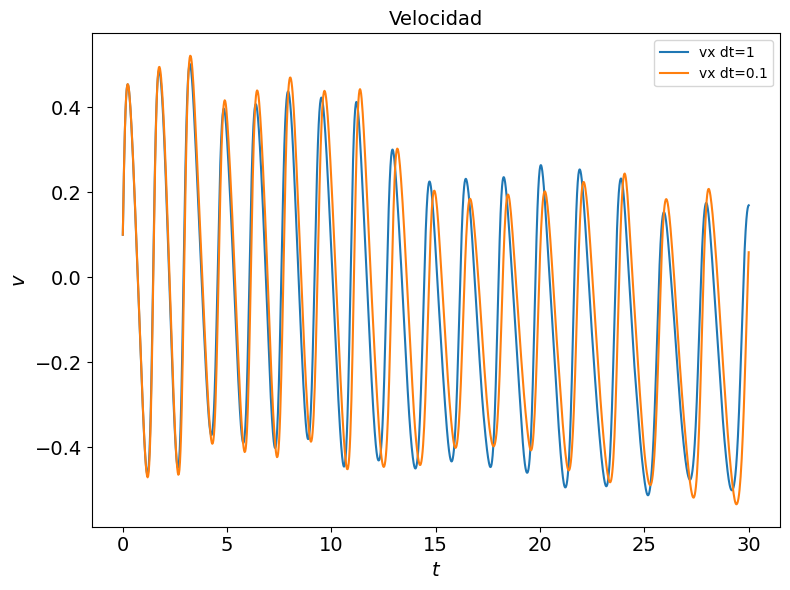

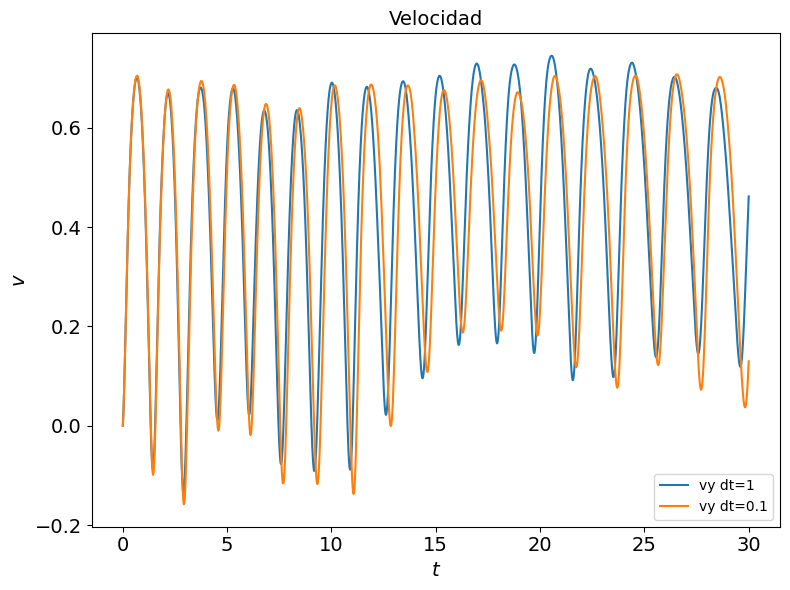

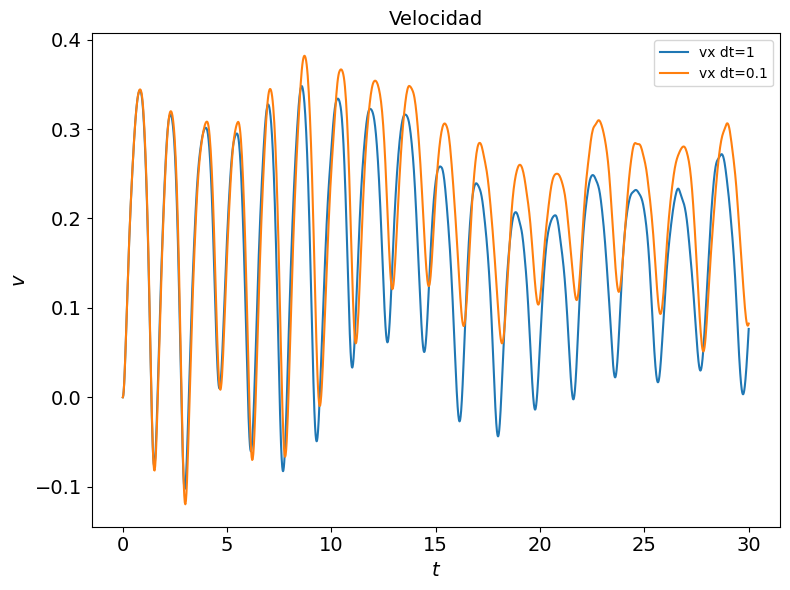

In [96]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

t=np.linspace(0,NT,int(NT*155*1)) # Defino mi Delta t como se obtuvo en en analisis

t1=np.linspace(0,NT,int(NT*155*1/4)) # Defino mi Delta t como se obtuvo en en analisis

# Suponiendo que r_plot, bz, drift_vel, Wx, Wy, Wz, gamma, x, y y t ya están definidos correctamente

# Crear las matrices de malla X, Y para el streamplot
X, Y = np.meshgrid(x, y)

# Transponer las matrices de velocidad del drift para que coincidan con las dimensiones de X e Y
U = drift_vel[0].T  # Transponer para que coincida con X
V = drift_vel[1].T  # Transponer para que coincida con Y

l = 2
vmin = -l
vmax = 1

# Gráfico 3D de la trayectoria de la partícula
fig1 = plt.figure(figsize=(8, 6))
ax = fig1.add_subplot(111, projection='3d')
ax.plot(r_plot[:, 0], r_plot[:, 1], r_plot[:, 2], label='Trayectoria de la Partícula dt=1')
ax.plot(r_plot1[:, 0], r_plot1[:, 1], r_plot1[:, 2], label='Trayectoria de la Partícula dt=0.1')
# Marcar el punto inicial
ax.scatter(r_plot[0, 0], r_plot[0, 1], r_plot[0, 2], color='g', s=100, label='Punto Inicial')

ax.set_xlabel('$y$', fontsize=14)
ax.set_ylabel('$x$', fontsize=14)
ax.set_zlabel('$z$', fontsize=14)
plt.legend()
plt.title('Trayectoria de la Partícula en 3D', fontsize=14)
plt.tight_layout()

# Gráfico 1D de gamma en función del tiempo
#t1=np.linspace(0,NT,len(gamma1))
fig2 = plt.figure(figsize=(8, 6))
plt.semilogy(t, gamma - 1, label='dt=1')
plt.semilogy(t1, gamma1 - 1, label='dt=0.1')
#plt.semilogy(t1, gamma1 - 1, label='dt=1')
plt.xlabel('$t$', fontsize=14)
plt.ylabel('$\log{(\gamma-1)}$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Energia cinetica de la particula', fontsize=14)
plt.tight_layout()
plt.legend()

# Gráfico 1D de la posición en x en función del tiempo
fig3 = plt.figure(figsize=(8, 6))
plt.plot(t, r_plot[:, 0],label='dt=1')
plt.plot(t1, r_plot1[:, 0],label='dt=0.1')
plt.xlabel('$t$', fontsize=14)
plt.ylabel('$x$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Posición en $x$', fontsize=14)
plt.tight_layout()
plt.legend()

# Gráfico 2D de la trayectoria de la partícula con el campo magnético Bz
fig4 = plt.figure(figsize=(8, 6))
plt.plot(r_plot[:, 0], r_plot[:, 1], 'r', linewidth=1, label='Trayectoria de la Partícula dt=1')
plt.plot(r_plot1[:, 0], r_plot1[:, 1], color= 'orange', linewidth=1, label='Trayectoria de la Partícula dt=0.1')
plt.plot(r_plot[0, 0], r_plot[0, 1], 'go', markersize=10, label='Punto Inicial')
plt.imshow(bz.T, origin='lower', extent=[x.min(), x.max(), y.min(), y.max()], cmap='viridis', alpha=0.8)
plt.colorbar(label='$B_z$', orientation='vertical')
plt.xlabel('$y$', fontsize=14)
plt.ylabel('$x$', fontsize=14)
plt.title('Campo Magnético $B_z$', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.tight_layout()

# Gráfico 2D de la trayectoria de la partícula y el streamplot de la velocidad del drift
fig5 = plt.figure(figsize=(8, 6))
plt.plot(r_plot[:, 0], r_plot[:, 1], 'r', linewidth=2, label='Trayectoria de la Partícula dt=1')
plt.plot(r_plot1[:, 0], r_plot1[:, 1], color='orange', linewidth=2, label='Trayectoria de la Partícula dt=0.1')
plt.plot(r_plot[0, 0], r_plot[0, 1], 'go', markersize=10, label='Punto Inicial')
plt.streamplot(X, Y, U, V, linewidth=1, density=3, cmap='viridis')
plt.colorbar(label='Intensidad de Velocidad')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.title('Velocidad del Drift', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.tight_layout()

# Gráfico 1D de la posición en x en función del tiempo
fig6 = plt.figure(figsize=(8, 6))
plt.plot(t, v[:, 0],label='vx dt=1')
plt.plot(t1, v1[:, 0],label='vx dt=0.1')
plt.xlabel('$t$', fontsize=14)
plt.ylabel('$v$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Velocidad', fontsize=14)
plt.tight_layout()
plt.legend()

# Gráfico 1D de la posición en x en función del tiempo
fig6 = plt.figure(figsize=(8, 6))
plt.plot(t, v[:, 1],label='vy dt=1')
plt.plot(t1, v1[:, 1],label='vy dt=0.1')
plt.xlabel('$t$', fontsize=14)
plt.ylabel('$v$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Velocidad', fontsize=14)
plt.tight_layout()
plt.legend()

# Gráfico 1D de la posición en x en función del tiempo
fig6 = plt.figure(figsize=(8, 6))
plt.plot(t, v[:, 2],label='vx dt=1')
plt.plot(t1, v1[:, 2],label='vx dt=0.1')
plt.xlabel('$t$', fontsize=14)
plt.ylabel('$v$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Velocidad', fontsize=14)
plt.tight_layout()
plt.legend()

# Mostrar los gráficos
plt.show()


In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.animation as animation

# # Supongamos que ya tienes las variables r_plot, bz, x, y definidas

# # Configurar la figura y el eje
# fig, ax = plt.subplots(figsize=(8, 6))

# # Dibujar el campo magnético
# im = ax.imshow(bz.T, origin='lower', extent=[x.min(), x.max(), y.min(), y.max()], cmap='viridis', alpha=0.8)
# fig.colorbar(im, label='$B_z$', orientation='vertical')

# # Configurar el eje
# ax.set_xlabel('$y$', fontsize=14)
# ax.set_ylabel('$x$', fontsize=14)
# ax.set_title('Campo Magnético $B_z$ con Trayectoria de la Partícula', fontsize=14)
# ax.set_xticks(np.arange(x.min(), x.max(), (x.max()-x.min())/10))
# ax.set_yticks(np.arange(y.min(), y.max(), (y.max()-y.min())/10))
# ax.tick_params(axis='both', which='major', labelsize=12)

# # Inicializar la trayectoria y el punto móvil
# trajectory, = ax.plot([], [], 'r', linewidth=1, label='Trayectoria de la Partícula')
# point, = ax.plot([], [], 'ko', markersize=10)  # Cambiado a blanco (white)

# # Función de inicialización
# def init():
#     trajectory.set_data([], [])
#     point.set_data([], [])
#     return trajectory, point

# # Función de actualización
# def update(frame):
#     trajectory.set_data(r_plot[:frame, 0], r_plot[:frame, 1])
#     point.set_data(r_plot[frame, 0], r_plot[frame, 1])
#     return trajectory, point

# # Crear la animación con un intervalo más pequeño
# ani = animation.FuncAnimation(fig, update, frames=range(1, len(r_plot), 10), init_func=init, blit=True, repeat=False, interval=10)

# # Mostrar la leyenda
# ax.legend()

# # Guardar la animación como archivo .mp4 o .gif (opcional)
# ani.save('trayectoria_particula.mp4', writer='ffmpeg', fps=30)
# # ani.save('trayectoria_particula.gif', writer='imagemagick', fps=30)

# # Mostrar la animación
# plt.show()


In [ ]:
#normb=np.zeros((Nx,Ny))

#for i in range(0,Nx):
#  for j in range(0,Ny):
#    normb[i,j]=np.linalg.norm(b[:,i,j])


In [ ]:
#drift_vel=np.zeros_like(b)

#print(e[:,0,0])

#for i in range(0,Nx):
#  for j in range(0,Ny):
#    drift_vel[:,i,j]=np.cross(e[:,i,j],b[:,i,j])/normb[i,j]**2


In [ ]:
#np.savetxt('velocity_drift.txt', drift_vel.reshape(-1, drift_vel.shape[-1]))

In [ ]:
np.savetxt('gamma1.txt',gamma)

In [ ]:

# Gráfico 2D de la trayectoria de la partícula con el campo magnético Bz
fig6 = plt.figure(figsize=(8, 6))
plt.imshow(bz.T, origin='lower', extent=[x.min(), x.max(), y.min(), y.max()], cmap='viridis', alpha=0.8)
plt.colorbar(label='$B_z$', orientation='vertical')
plt.xlabel('$y$', fontsize=14)
plt.ylabel('$x$', fontsize=14)
plt.title('Campo Magnético $B_z$', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()